# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [ ]:
import numpy as np
from skimage.io import imread

img = imread(r'/chain_small.jpg')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

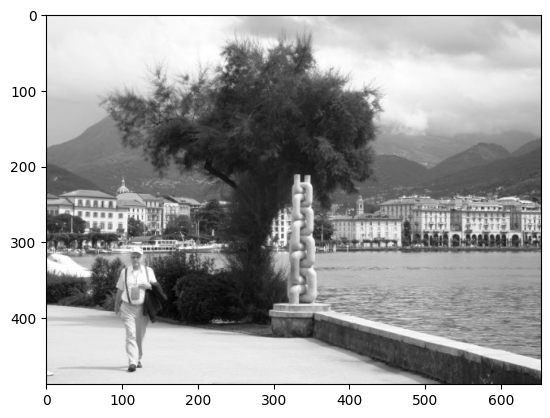

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [ ]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

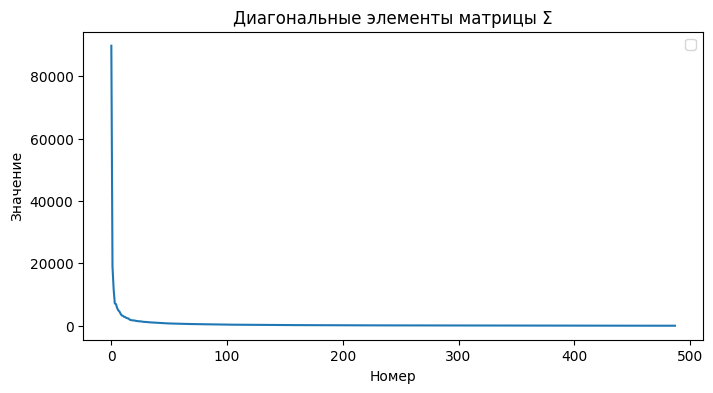

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(S)
plt.title('Диагональные элементы матрицы Σ')
plt.xlabel('Номер')
plt.ylabel('Значение')
plt.legend()

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

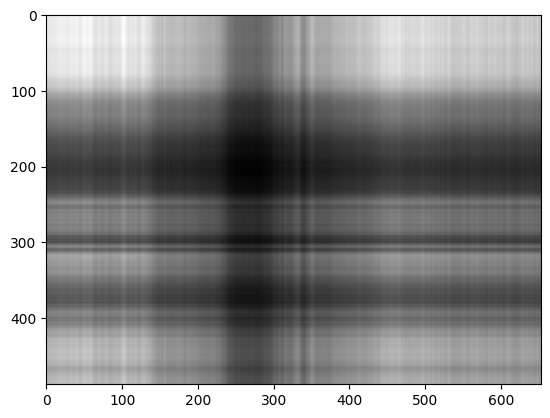

In [ ]:
u_1 = U[:, 0:1]
s_1 = np.diag(S)[0:1, 0:1]
v_t_1 = VT[0:1, :]
B_1 = u_1 @ s_1 @ v_t_1
imgplot = plt.imshow(B_1, cmap='gray')

Результат вполне ожидаем: из описания сингулярного разложения ясно, что первой компоненты ранга 1 недостаточно, чтобы увидеть хотя бы како-то очертание силуэтов, изображенных на картинке, однако даже она вносит вклад в формирование всего изображения, о чем свидетельствуют цветовые акценты, которые соответствуют картинке (высокая концентрация черного примерно на том же уровне, где на исходной картинке расположено темное дерево).

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

In [ ]:
def sum_comp(num_1, num_2):
  u = U[:, num_1:num_2]
  s = np.diag(S)[num_1:num_2, num_1:num_2]
  v_t = VT[num_1:num_2, :]
  result = u @ s @ v_t
  imgplot = plt.imshow(result, cmap='gray')
  plt.title(f"Сумма компонент ранга 1 с {num_1 + 1} по {num_2}")

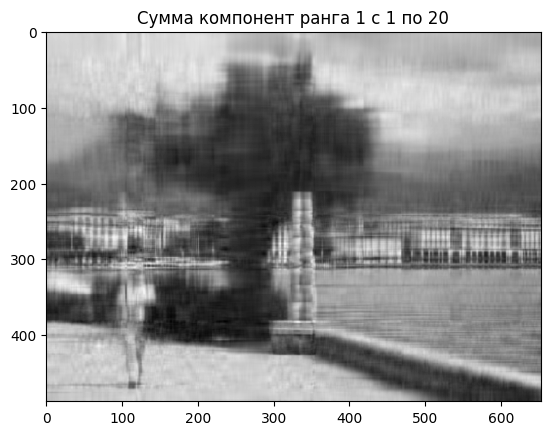

In [ ]:
sum_comp(0, 20)

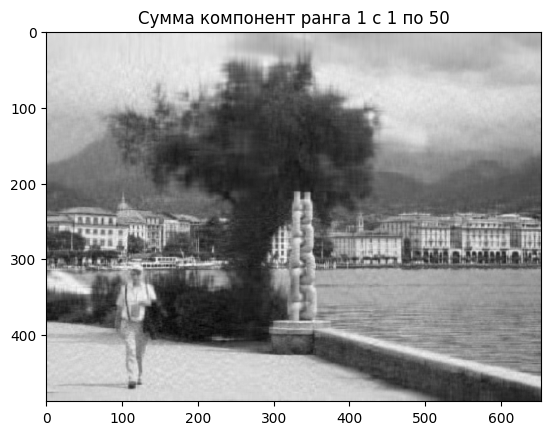

In [ ]:
sum_comp(0, 50)

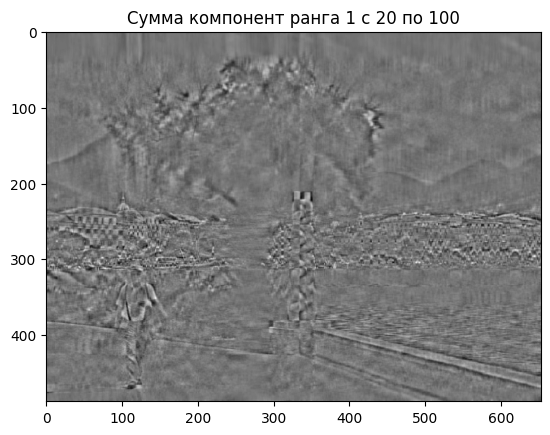

In [ ]:
sum_comp(19, 100)

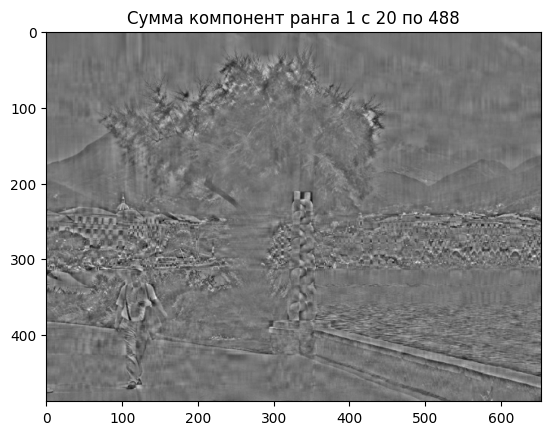

In [ ]:
sum_comp(19, S.shape[0])

Диагональные значения в матрице $\Sigma$ расположены в порядке убывания. Ясно, что чем больше значение, тем важнее его роль в отображении картинки, поэтому суммы компонент с 1 по 20 и с 1 по 50 вполне наглядно отображают исходную фотограию; соблюдена цветовая гамма. Однако изображение размыто.

При рассмотрении бОльших значений (с 20 по 100 и с 20 по 488 - последняя компонента) картинка видна уже не так отчетливо, точнее сказать, виден только силуэт изображенных объектов при внимательном рассмотрении. Эти значения скорее нужны для придания образам четкости.

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

Из прошлого задания видно, что при рассмотрении суммы компонент с 1 до 50 картинка выглядит очень похожей на исходную, однако некоторые силуэты немного размыты. Для придания четкости добавим еще 30 значений - это несильно повлияет на память, однако видно (см. пример ниже), что картинка выглядит лучше.

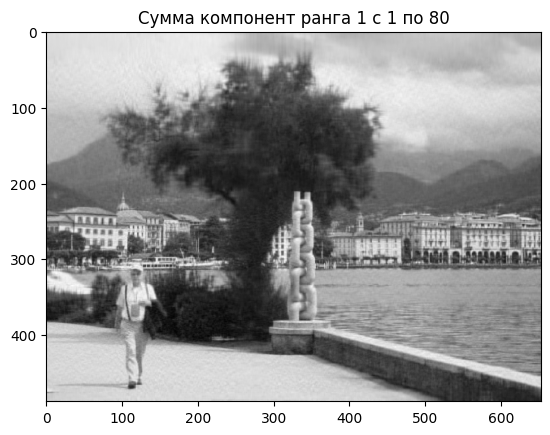

In [ ]:
sum_comp(0, 80)

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

In [ ]:
u = U[:, 0:80]
s = np.diag(S)[0:80, 0:80]
v_t = VT[0:80, :]
print(f"Размер U = {U.shape}")
print(f"Размер S = {S.shape}")
print(f"Размер VT = {VT.shape}")

Размер U = (488, 488)
Размер S = (488,)
Размер VT = (488, 653)


Для хранения матрицы в виде суммы компонент от 1 до 80 требуется $80 \cdot (488+ 653 + 1) = 91360$ памяти вместо $488 \cdot 653 = 318664$;

 $$\frac{318664}{91360} \approx 3.48$$

Ответ: чуть меньше, чем в 3.5 раза

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [ ]:
s = S[0:80]
size_1 = u.nbytes + s.nbytes + v_t.nbytes
size_2 = img.nbytes
ratio = img.nbytes / size_1
print(f"Исходная матрица занимает {size_1} единиц памяти")
print(f"Компоненты сингулярного разложения с 1 по 80 занимают {size_2} единиц памяти")
print(f"Отношение = {ratio}")

Исходная матрица занимает 730880 единиц памяти
Компоненты сингулярного разложения с 1 по 80 занимают 2549312 единиц памяти
Отношение = 3.4880035026269702


Результат полностью согласуется с ответом предыдущего пункта

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

Рассмотрим матрицу $X^TX$: она симметрична $\Rightarrow$ является матрицей самосопряженного линейного оператора для некоторого $\varphi$. Значит, $\exists$ ОНБ из собственных векторов, в котором матрица $\varphi$ принимает диагональный вид. Пусть это базис $e = (e_1, .., e_n) \Rightarrow \forall w \in \langle e_1, .., e_n \rangle: w = \alpha_1 e_1 + ... + \alpha_n e_n ; |w|^2 = \alpha^2_1 + ... + \alpha^2_n $

Оператор $\varphi$ является самосопряженным $\Rightarrow$ $X^TX =
\begin{pmatrix}
\sigma^2_1 & 0 & ... & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & \sigma^2_2 & ... & 0 \\
0 & 0 & ... & \sigma^2_n \end{pmatrix} $

Домножим матрицу $X^TX$ справа на вектор w:

$X^TXw = \begin{pmatrix}
\sigma^2_1 & 0 & ... & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & \sigma^2_2 & ... & 0 \\
0 & 0 & ... & \sigma^2_n \end{pmatrix} \cdot (\alpha_1 e_1 + ... + \alpha_n e_n) = \sigma^2_1\alpha_1 e_1 + ... + \sigma^2_n\alpha_n e_n$

$|Xw|^2 = (Xw)^T(Xw) = w^T(X^TXw) = \sigma^2_1\alpha_1^2 + ... + \sigma^2_n\alpha_n^2$

В условии указано, что $\sigma_1$ — старшее сингулярное число матрицы $X$, то есть оно принимает наибольшее значение, из чего немедленно следует, что $\sigma^2_1|w|^2 \geq |Xw|^2\Leftrightarrow \sigma_1 \geq \frac{|Xw|}{|w|}$. Ясно, что равенство будет достигаться в случае, когда $\sigma_1$ - собственное значение собственного вектора w - из этого следуют первые два равенства из условия.

Докажем третье: $|u^TXv|^2 = (u^TXv)^T u^TXv = v^T X^T u u^T X v = v^T X^T X v = |Xv|^T $

$\Rightarrow \sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$

Итак, цепочка равенств доказана.

**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$.

Для начала найдем ранг матрицы A:

Во-первых, все элементы первой строки = 0, т.к, sin(0) = 0

Во-вторых, заметим, что  $\forall l \in \{1, .., n - 1\}, s \in \{2, .., n - 1\}: a_{lj} = a_{sj} \cdot \frac{sin(l)}{sin(s)} \Rightarrow$ строки ЛЗ, а значит, в УСВ матрицы А останется одна строка $\Rightarrow$ rkA = 1.

Теперь найдем разложение:
$rkA = 1 = rk \Sigma = r$ $\Rightarrow$  размер матрицы $\Sigma$ - это $1 \times 1$, а $U, V$ - векторы размеров $n \times 1, 1 \times n$ соответственно.


Найдем такие матрицы U' и V', что A = U'V^'T:

$$U' = \begin{pmatrix} sin(0) \\ sin(1) \\ \vdots \\ sin(n - 1) \end{pmatrix},
V' = \begin{pmatrix} cos(0) \\ cos(1) \\ \vdots \\ cos(n - 1) \end{pmatrix}$$

Далее нам предстоит найти $\sigma_1$ и ортонормировать $U', V'$:

Пусть $a = |U'| = \sqrt{\sum^{n - 1}_{0} sin(i)^2}, b = |V'| = \sqrt{\sum^{n - 1}_{0} cos(i)^2}$;

Тогда рассмотрим $\sigma_1 = ab, V = \frac{1}{b}V', U = \frac{1}{a}U'$

$\Sigma = (ab) = (\sigma_1)$

A = U'V^'T = $\frac{1}{a}\begin{pmatrix} sin(0) \\ sin(1) \\ \vdots \\ sin(n - 1) \end{pmatrix} (ab) \frac{1}{b} \begin{pmatrix} cos(0) \\ cos(1) \\ \vdots \\ cos(n - 1) \end{pmatrix}^T$


**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

1) Столбцы матрицы V отронормированы $\Rightarrow V^TV = E$;  рассмотрим $A = U\Sigma V^T$ и домножим справа на V:

$$ AV = U\Sigma V^TV = U\Sigma$$
Известно, что $\Sigma = diag(\sigma_1, ..., \sigma_r, 0, ..., 0)$. Получается, что  первые $r$ столбцов будут ненулевыми, а столбцы с $r + 1$ по $n$ - нулевые. Из этого и следует, что
 $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$

2) $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$ $\Rightarrow$ образы векторов $(v_1, .., v_r)$ - базис образа.
$u_i = \frac{Av_i}{\mu _i} \forall i \in \{1, .., r\} $ по построению, где $\mu _i \neq 0$; Тогда $u_i$ - просто константа на образ $v_i$, то есть из векторов $u_1, .., u_r$ тоже можно составить базис образа; $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$; ЧТД


**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


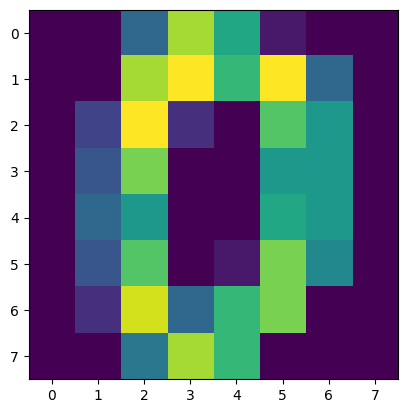

In [ ]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [ ]:
svd_U1, svd_S1, svd_VT1 = svd(digits.data, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

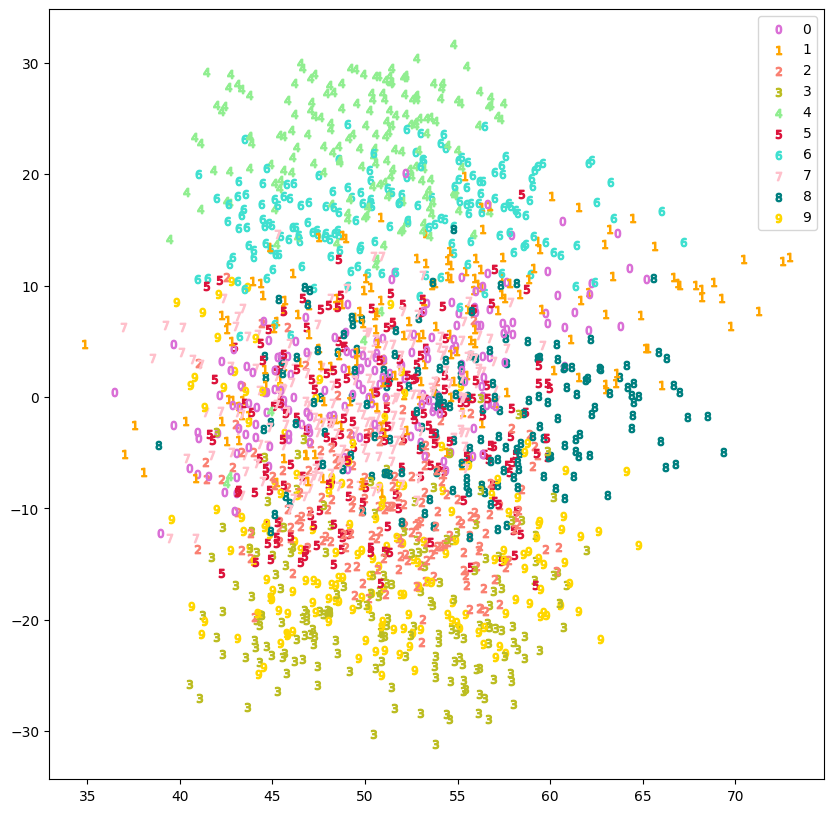

In [ ]:
plt.figure(figsize=(10, 10))
matr = (svd_U1 @ np.diag(svd_S1))[:, [0, 1]]
colors = ['orchid', 'orange', 'salmon', 'tab:olive', 'lightgreen', 'crimson', 'turquoise', 'pink', 'teal', 'gold']
for i, x, y in zip(range(matr.shape[0]), matr[:, 0], matr[:, 1]):
    plt.scatter(x, y, marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])
plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

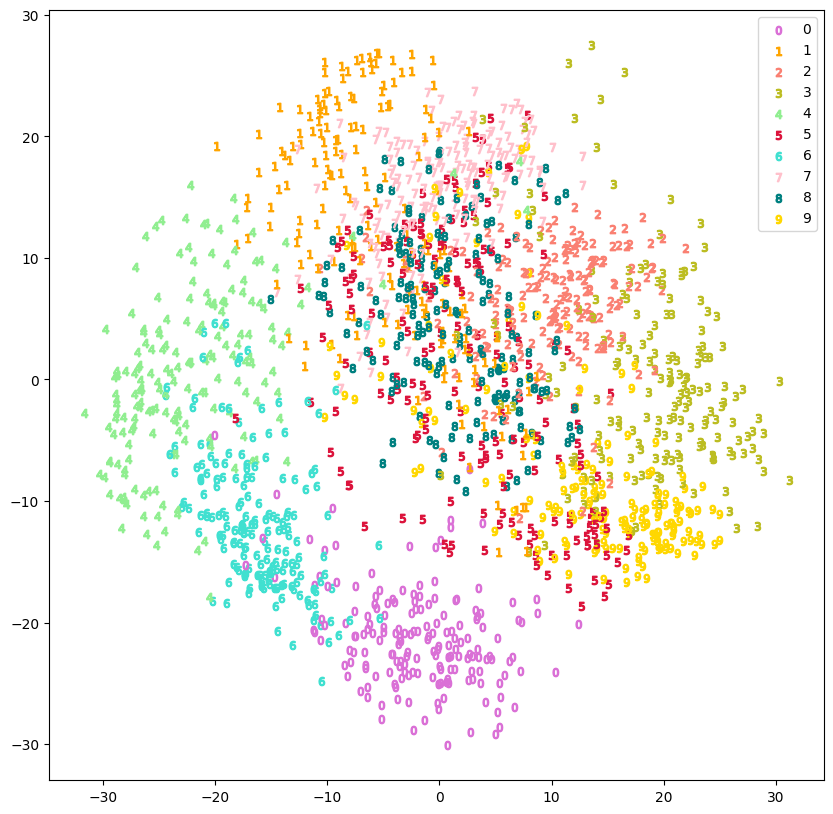

In [ ]:
data = digits.data - np.mean(digits.data, axis = 0, keepdims = True)
svd_U2, svd_S2, svd_VT2 = svd(data, full_matrices = False)
plt.figure(figsize=(10, 10))
matr = (svd_U2 @ np.diag(svd_S2))[:, [0, 1]]
colors = ['orchid', 'orange', 'salmon', 'tab:olive', 'lightgreen', 'crimson', 'turquoise', 'pink', 'teal', 'gold']
for i, x, y in zip(range(matr.shape[0]), matr[:, 0], matr[:, 1]):
    plt.scatter(x, y, marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])
plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

В первом случае точки расположены хаотично, не прослеживается никакой закономерности. Кроме того, маскимальные значения координат по оси OX превышают отметку 70.

Во втором случае, напротив, прослеживается, что точки одного цвета сосредоточены в одном месте - на графике наблюдаются "цветные пятна". Теперь максимальные значения по оси OX не превышают 35 - это еще одно преимущество перед первым графиком (легче вывести зависимость)

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

In [ ]:
from sklearn.random_projection import GaussianRandomProjection

grp_obj = np.shape(digits.data)[1]

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$:

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [ ]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

<ipython-input-57-56259113fdad>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
<ipython-input-57-56259113fdad>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
<ipython-input-57-56259113fdad>:14: UserWarning: 

`distplot` is a

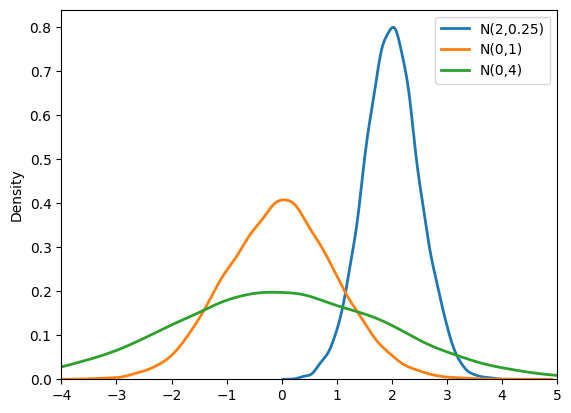

In [ ]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат.
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

<Axes: >

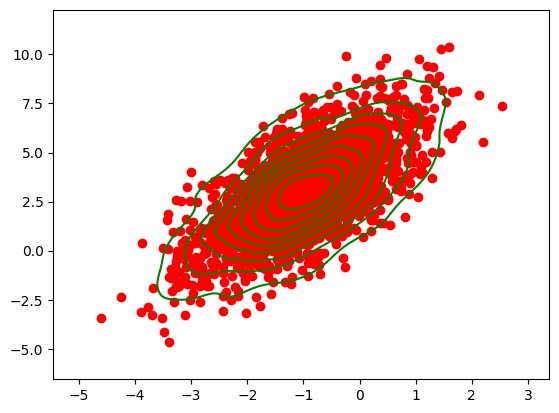

In [ ]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(x = s[:, 0], y = s[:, 1], color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [ ]:
n = 1000
X = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.array([[1,-2],[-2,5]]), size=n)

**2. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

<ipython-input-60-0d0ced630755>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = X[:,0], y = X[:,1], shade=False, color='purple', s = 20)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 's'
  cset = contour_func(


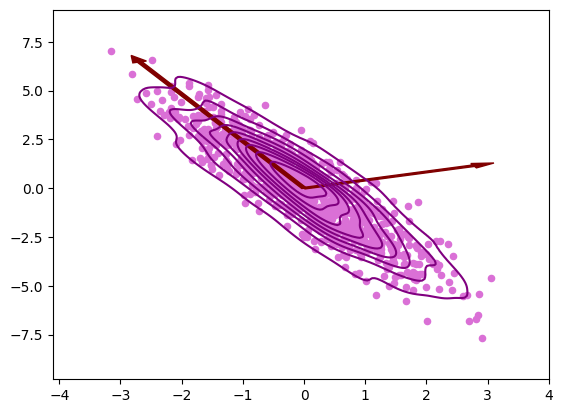

In [ ]:
x_U, x_S, x_VT = svd(X, full_matrices=False)
plt.scatter(X[:,0], X[:,1], color='orchid', s = 20)
sns.kdeplot(x = X[:,0], y = X[:,1], shade=False, color='purple', s = 20)
plt.arrow(0, 0, 7 * x_VT[0, 0], 7 * x_VT[0, 1], color = 'maroon', width = 0.08)
plt.arrow(0, 0, 3 * x_VT[1, 0], 3 * x_VT[1, 1], color = 'maroon', width = 0.08)

plt.show()

**3. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

$ \chi_{A}(\lambda) = (1 - \lambda)(5 - \lambda) - (-2)(-2) = \lambda^{2} - 6\lambda + 5 - 4 = \lambda^{2} - 6\lambda + 1 \Rightarrow собственные значения: \lambda_1 = 3 + \sqrt{8}, \lambda_2 = 3 - \sqrt{8}$.

Теперь найдем собственные векторы:

$E - \lambda_1E = \begin{pmatrix}
1 - 3 - \sqrt{8} & -2\\
-2 & 5 - 3  -\sqrt{8}
\end{pmatrix} \Rightarrow v_1 = \begin{pmatrix} 1 + \sqrt{2} \\ 1 \end{pmatrix} $

$E - \lambda_2E = \begin{pmatrix}
1 - 3 + \sqrt{8} & -2\\
-2 & 5 - 3  + \sqrt{8}
\end{pmatrix} \Rightarrow v_2 = \begin{pmatrix} 1 - \sqrt{2} \\ 1 \end{pmatrix} $

Так как от нормирования вектора направление не меняется, направлениям главных осей соответствуют данные и ортогональные, и ортонормированные векторы.

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**4. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже.

<ipython-input-61-c6096a4559c6>:4: RuntimeWarning: covariance is not positive-semidefinite.
  s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov = Sigma, size = n)
<ipython-input-61-c6096a4559c6>:5: RuntimeWarning: covariance is not positive-semidefinite.
  s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov = Sigma, size = n)


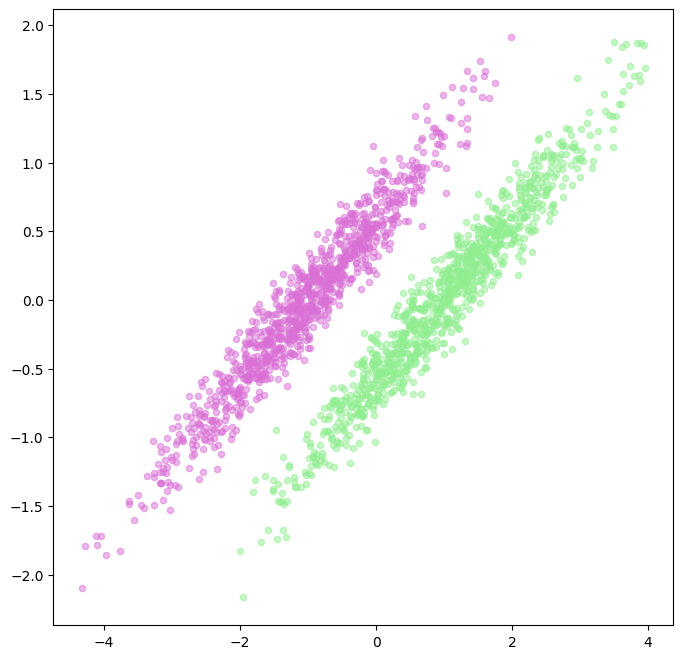

In [ ]:
plt.figure(figsize=(8, 8))
n = 1000
Sigma = np.array([[1.15, 0.7],[0.7, 0.4]])
s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov = Sigma, size = n)
s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov = Sigma, size = n)
plt.scatter(s1[:,0], s1[:,1], color='orchid', alpha=0.5, s = 20)
plt.scatter(s2[:,0], s2[:,1], color='lightgreen', alpha=0.5, s = 20)

**5. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

<ipython-input-62-17d7aacf24d4>:4: RuntimeWarning: covariance is not positive-semidefinite.
  s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov = Sigma, size = N)
<ipython-input-62-17d7aacf24d4>:5: RuntimeWarning: covariance is not positive-semidefinite.
  s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov = Sigma, size = N)


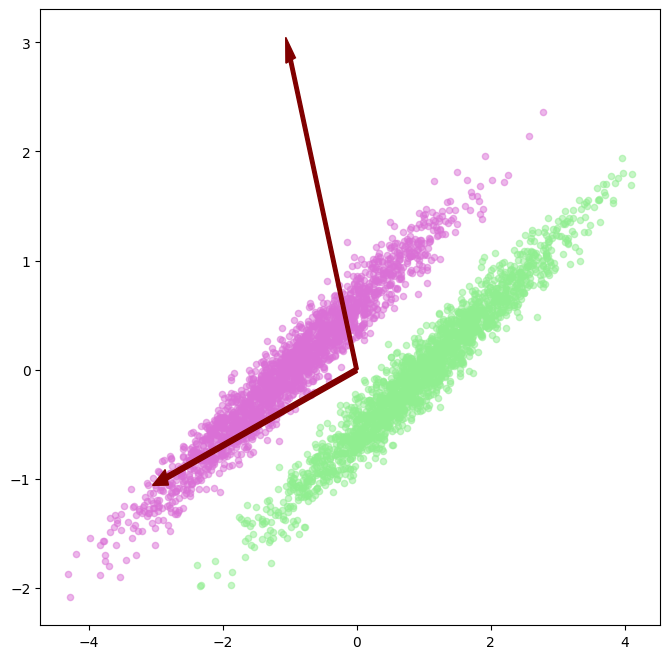

In [ ]:
plt.figure(figsize=(8, 8))
n = 1000
Sigma = np.array([[1.15, 0.7],[0.7, 0.4]])
s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov = Sigma, size = N)
s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov = Sigma, size = N)
plt.scatter(s1[:,0], s1[:,1], color='orchid', alpha=0.5, s = 20)
plt.scatter(s2[:,0], s2[:,1], color='lightgreen', alpha=0.5, s = 20)
XX = np.concatenate((s1, s2), axis = 0)
xxU_svd, xxS_svd, xxVT_svd = svd(XX, full_matrices=False)
plt.arrow(0, 0, 3 * xxVT_svd[0, 0], 3 * xxVT_svd[0, 1],color = 'maroon', width = 0.05)
plt.arrow(0, 0, 3 * xxVT_svd[1, 0], 3 * xxVT_svd[1, 1],color = 'maroon', width = 0.05)

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**6. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

Похоже, что ни один из двух предоставленных SVD признаков не помогает обнаружить эту структуру. Возможно, это связано с тем, что данные не распределены нормально

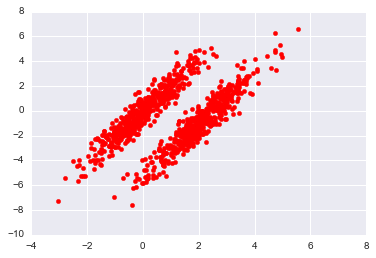

In [ ]:
# Just keep this image as a sample

**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

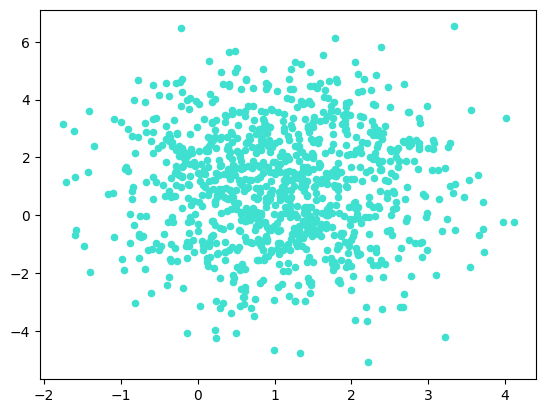

In [ ]:
n = 1000
a = np.array([1, 1])
Sigma = np.array([[1, 0],[0, 4]])
X = np.random.multivariate_normal(mean=a, cov=Sigma, size=n)
plt.scatter(X[:,0], X[:,1], color='turquoise', s =20)

**8. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

Заданная в условии матрица $\Sigma$ диагональна ($\Sigma^T = \Sigma$); кроме того, соответствующая ей квадратичная форма Q > 0 $\Rightarrow$ нужно юудет рассмотреть направления, исходящие из центра и параллельные осям OX и OY

**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

<ipython-input-64-be4293642a2f>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = X[:, 0], y = X[:, 1], shade=False, color='salmon')


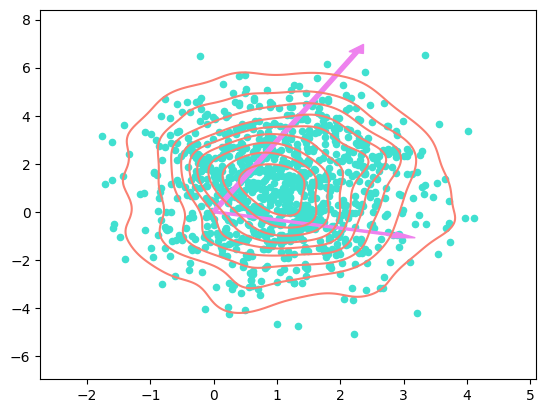

In [ ]:
U, S, VT = svd(X, full_matrices=False)

plt.scatter(X[:,0], X[:,1], color='turquoise', s =20)
sns.kdeplot(x = X[:, 0], y = X[:, 1], shade=False, color='salmon')
plt.arrow(0, 0, 7 * VT[0, 0], 7 * VT[0, 1], color = 'violet', width = 0.08)
plt.arrow(0, 0, 3 * VT[1, 0], 3 * VT[1, 1], color = 'violet', width = 0.08)